In [307]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [308]:
d = 4
x0 = 4
x = np.linspace(-31, 31, 63)
y = np.linspace(-31, 31, 63)
X, Y = np.meshgrid(x, y)
rho = np.exp(-((X - x0)**2 + Y**2) / d**2) - np.exp(-((X + x0)**2 + Y**2) / d**2)

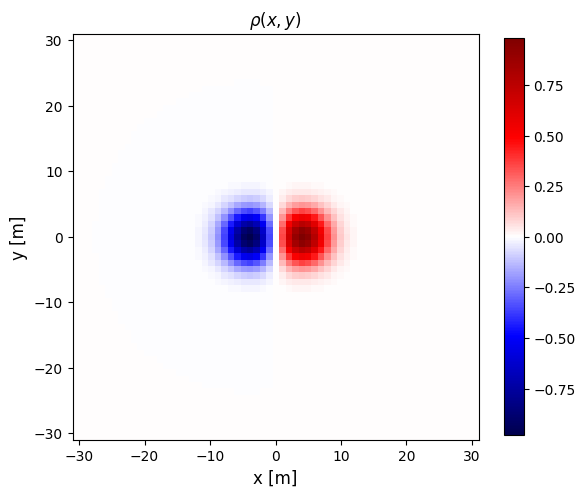

In [309]:
plt.figure(figsize=(6, 6))
plt.imshow(rho, origin='lower', cmap='seismic', extent=[X.min(), X.max(), Y.min(), Y.max()], aspect='equal')
plt.title(r"$\rho(x, y)$", fontsize=12)
plt.xlabel("x [m]", fontsize=12)
plt.ylabel("y [m]", fontsize=12)
plt.colorbar(shrink=0.7)
plt.tight_layout()
plt.show()

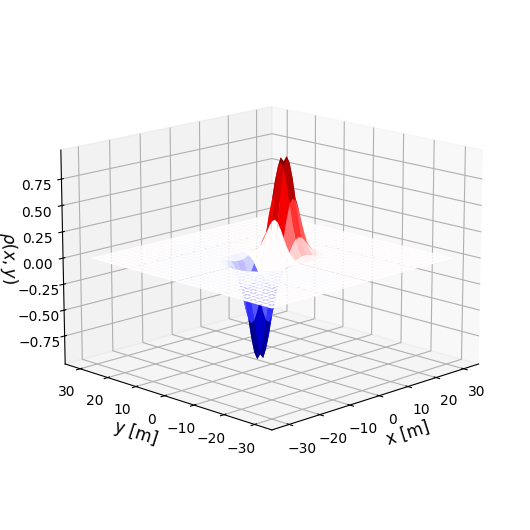

In [284]:
fig = plt.figure(figsize=(6, 7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, rho, cmap='seismic', edgecolor='none')

ax.set_xlabel("x [m]", fontsize=12)
ax.set_ylabel("y [m]", fontsize=12)
ax.set_zlabel(r"$\rho(x, y)$", fontsize=12)
ax.view_init(elev=15, azim=-135)
ax.set_box_aspect(None, zoom=0.9)
fig.subplots_adjust(left=0.1, right=0.95)
plt.show()


In [242]:
def plotS(dfs, labels, colors, linestyles=None, xlim=(0, 500), ylim=None):
    if linestyles is None:
        linestyles = len(dfs) * ["-"]
        
    plt.figure(figsize=(8, 6))
    for df, label, color, linestyle in zip(dfs, labels, colors, linestyles):
        plt.plot(df["iteration"], df["S"], label=label, color=color, linestyle=linestyle, linewidth=2)
        
    plt.axhline(y=0, color="black", linestyle="-", linewidth=0.8)
    plt.axhline(y=-255.018, color="gray", linestyle="--", linewidth=1.2, label=r"$S \approx -255.018$")
    
    plt.xlabel("iteracja", fontsize=12)
    plt.ylabel("Funkcjonał S", fontsize=12)
    plt.xlim(*xlim)
    if ylim:
        plt.ylim(*ylim)
    plt.grid(True)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

In [243]:
colors=["navy", "maroon", "goldenrod", "steelblue", "palevioletred"]
labels=["relaksacja", r"nadrelaksacja, $\omega=1.9$", "minimalizacja parabolą", "minimalizacja gradientem", "minimalizacja losowym krokiem"]
linestyles=["-", "-", ":", ":", "-"]

In [244]:
S1 = pd.read_csv("./cmake-build-debug/S(iteration)zad1.csv")
S2 = pd.read_csv("./cmake-build-debug/S(iteration)zad2.csv")
S3 = pd.read_csv("./cmake-build-debug/S(iteration)zad3.csv")

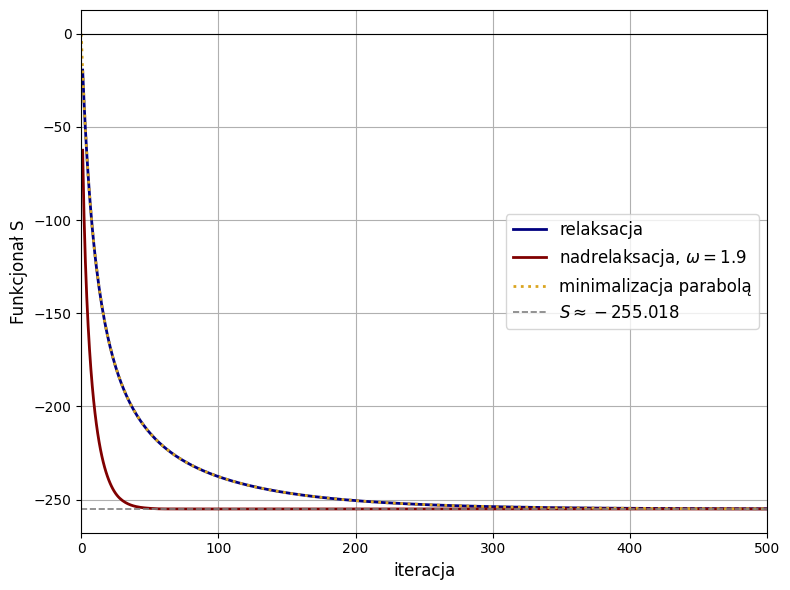

In [245]:
plotS(dfs=[S1, S2, S3], labels=labels[0:4], colors=colors[0:4], linestyles=linestyles[0:4])

In [246]:
def load_data(path, params):
    return [pd.read_csv(path.format(p)) for p in params]

In [247]:
#zadanie 4
betas = [0.45, 0.46, 0.47, 0.48, 0.49, 0.495, 0.497, 0.5]
colors_beta = ["navy", "steelblue", "darkolivegreen", "darkorchid", "palevioletred", "maroon", "chocolate", "goldenrod"]
dfs_beta = load_data("./cmake-build-debug/S(iteration)[beta={:.6f}]zad4.csv", betas)
labels_beta = [fr"$\beta = {b}$" for b in betas]


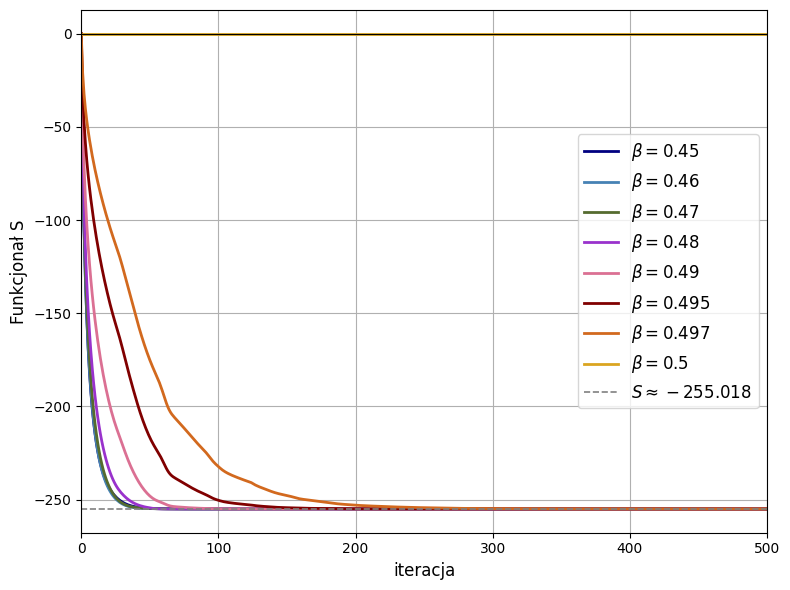

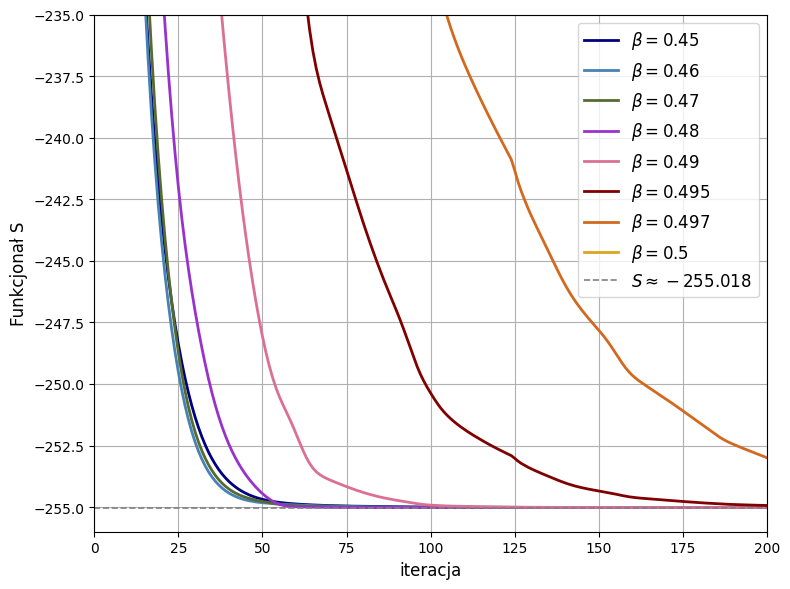

In [248]:
plotS(dfs=dfs_beta, labels=labels_beta, colors=colors_beta)
plotS(dfs=dfs_beta, labels=labels_beta, colors=colors_beta, xlim=(0, 200), ylim=(-256, -235))

In [249]:
#zadanie 5
rs = [0.1, 0.2, 0.3, 0.5, 1]
colors_r = ["navy", "steelblue", "darkorchid", "palevioletred", "maroon"]
dfs_r = load_data("./cmake-build-debug/S(iteration)[rand_r={:.6f}]zad5.csv", rs)
labels_r = [fr"$r = {r}$" for r in rs]


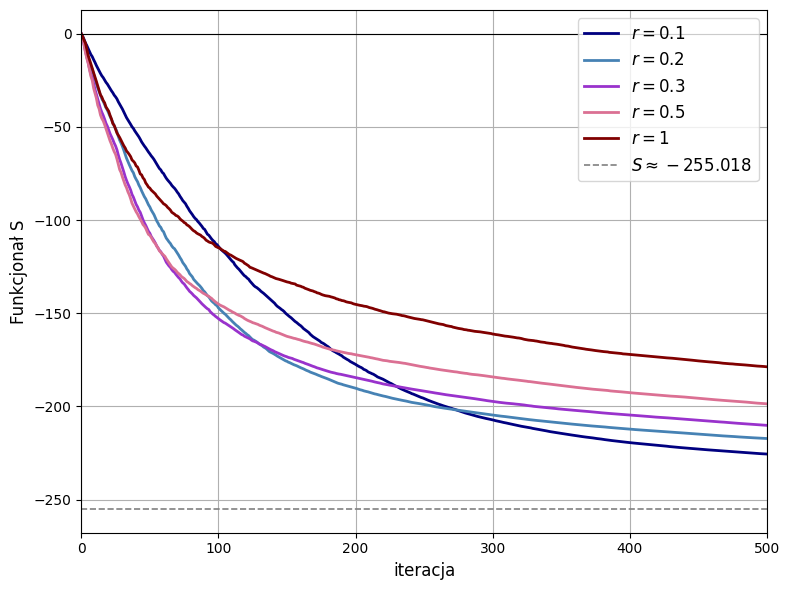

In [250]:
plotS(dfs=dfs_r, labels=labels_r, colors=colors_r)

In [251]:
#Wszystkie metody
S4 = pd.read_csv("./cmake-build-debug/S(iteration)[beta=0.460000]zad4.csv")
S5 = pd.read_csv("./cmake-build-debug/S(iteration)[rand_r=0.200000]zad5.csv")

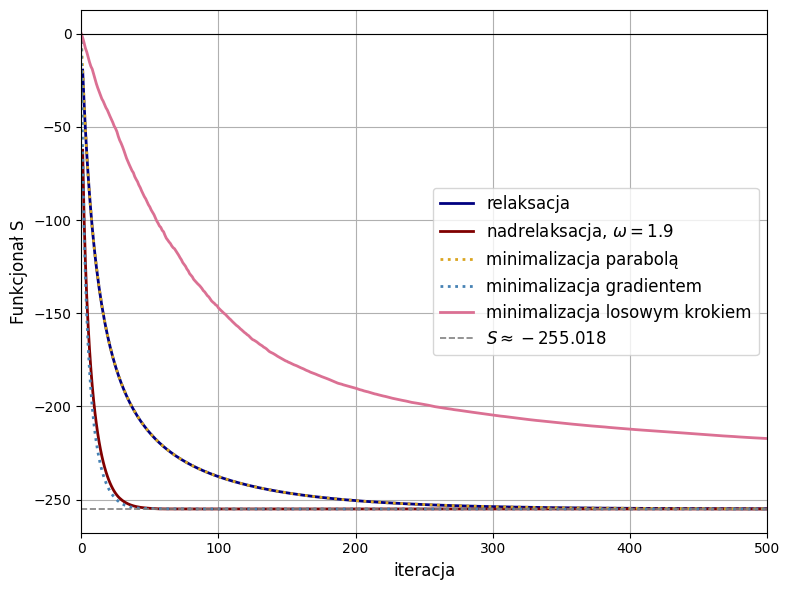

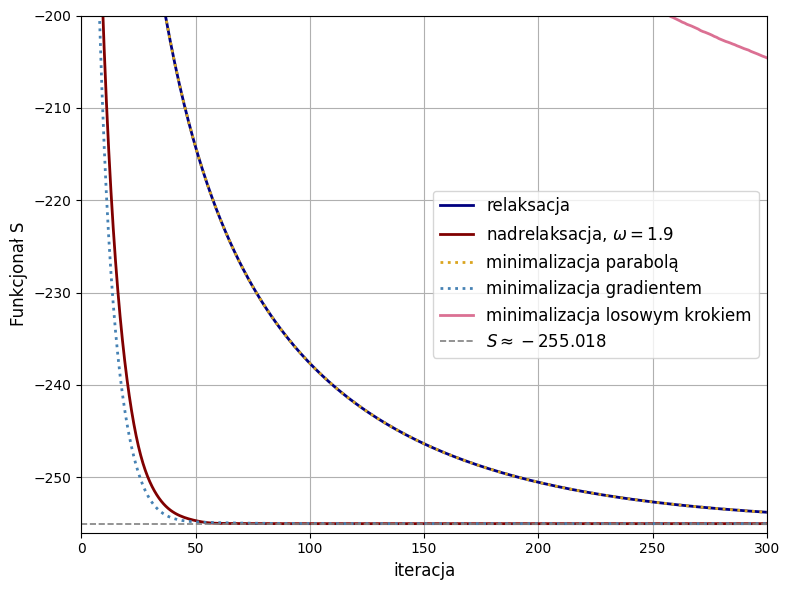

In [252]:
plotS(dfs=[S1, S2, S3, S4, S5], labels=labels, colors=colors, linestyles=linestyles)
plotS(dfs=[S1, S2, S3, S4, S5], labels=labels, colors=colors, linestyles=linestyles, xlim=(0, 300), ylim=(-256, -200))

In [253]:
data = {
    r"$u(x,y)$": {100: pd.read_csv("./cmake-build-debug/u(iter=100).csv"), 500: pd.read_csv("./cmake-build-debug/u(iter=500).csv")},
    r"$\rho '(x,y)$": {100: pd.read_csv("./cmake-build-debug/rhoPrim(iter=100).csv"), 500: pd.read_csv("./cmake-build-debug/rhoPrim(iter=500).csv")},
    r"$\delta(x,y)$": {100: pd.read_csv("./cmake-build-debug/delta(iter=100).csv"), 500: pd.read_csv("./cmake-build-debug/delta(iter=500).csv")}
}

In [259]:
def grid(df):
    i_vals = sorted(df["i"].unique())
    j_vals = sorted(df["j"].unique())
    Z = df.pivot(index='j', columns='i', values='value').values
    J, I = np.meshgrid(j_vals, i_vals)
    return I, J, Z

In [302]:
quantities = [r"$u(x,y)$", r"$\rho '(x,y)$", r"$\delta(x,y)$"]
colormaps = {r"$u(x,y)$": "RdBu", r"$\rho '(x,y)$": "seismic", r"$\delta(x,y)$": "PiYG"}
iters = [100, 500]

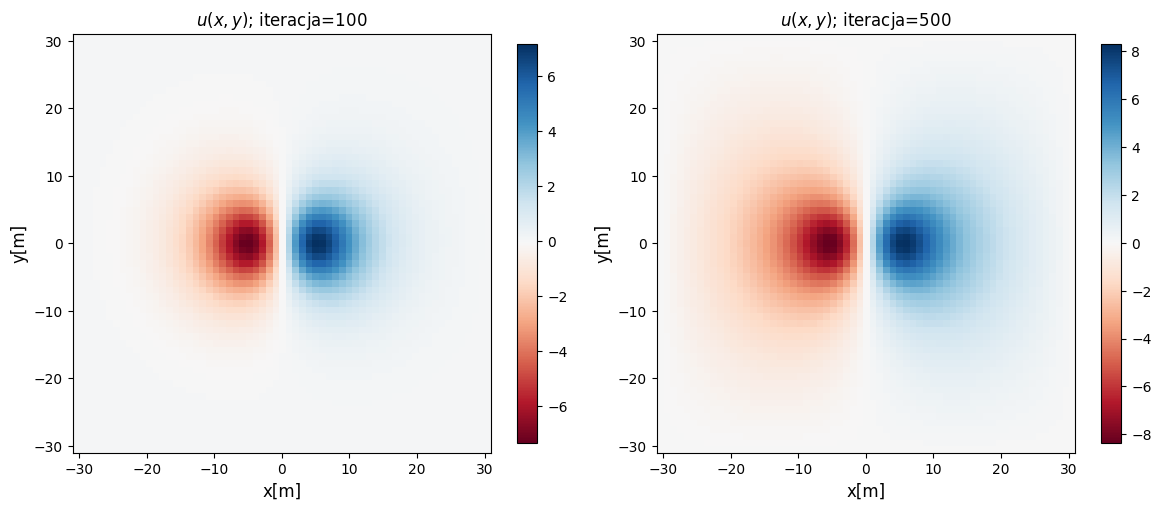

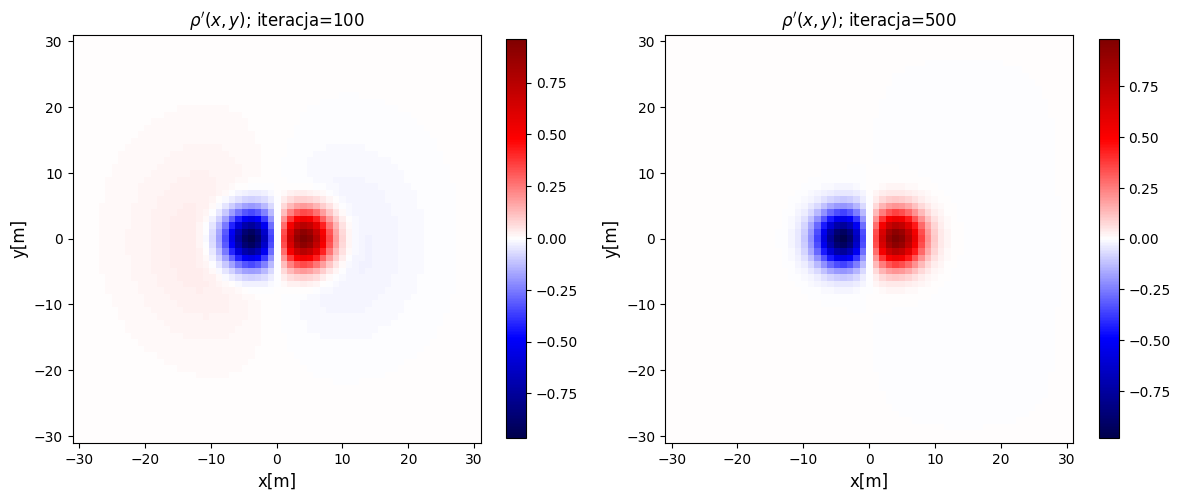

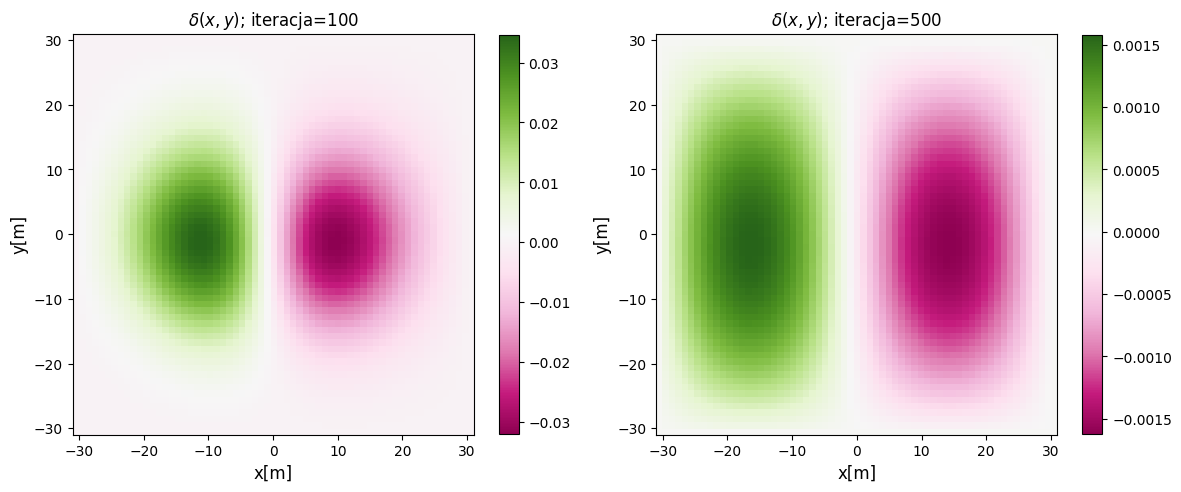

In [303]:
for key in quantities:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    for idx, it in enumerate(iters):
        I, J, Z = grid(data[key][it])
        ax = axes[idx]
        cmap = colormaps.get(key)
        im = ax.imshow(Z, origin='lower', cmap=cmap, extent=[I.min(), I.max(), J.min(), J.max()])
        ax.set_title(f"{key}; iteracja={it}", fontsize = 12)
        ax.set_xlabel("x[m]", fontsize=12)
        ax.set_ylabel("y[m]", fontsize=12)
        fig.colorbar(im, ax=ax, shrink=0.7)
    plt.tight_layout()
    plt.show()

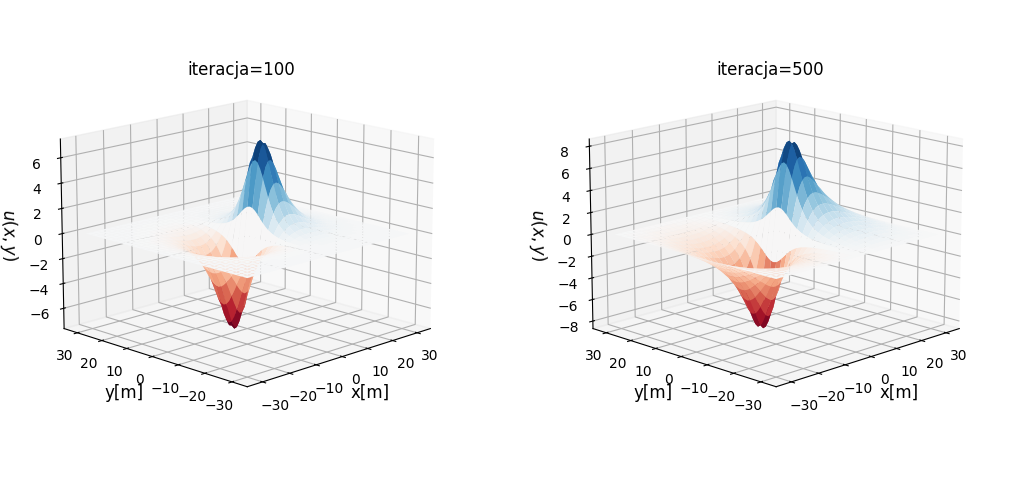

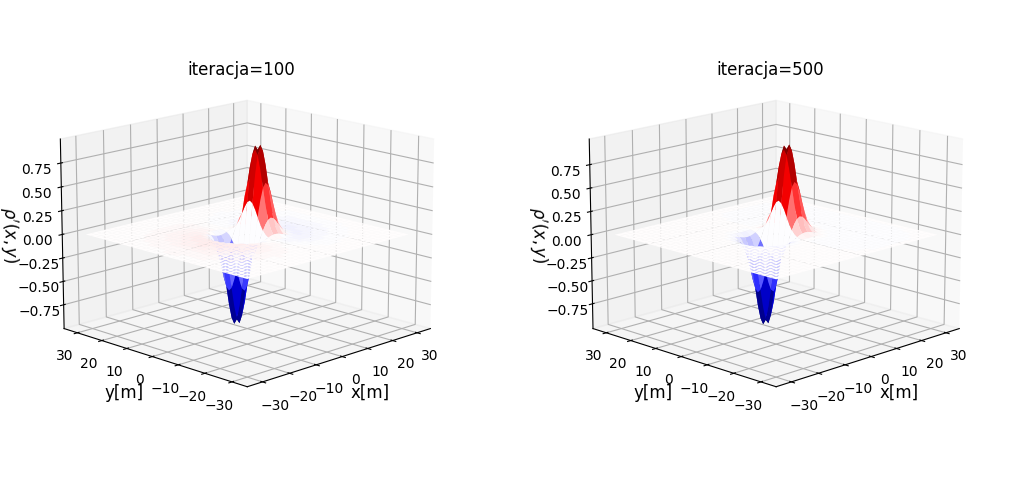

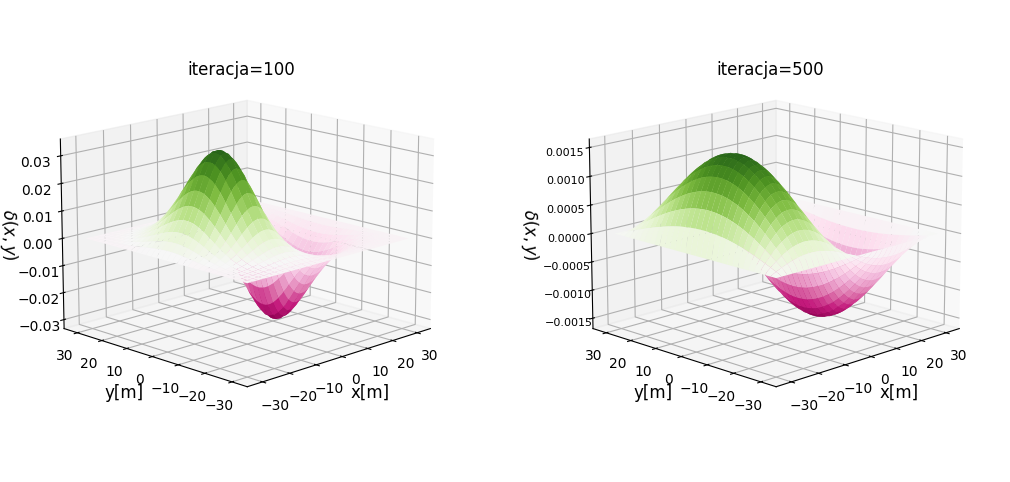

In [304]:
for key in quantities:
    fig = plt.figure(figsize=(14, 6))
    for idx, it in enumerate(iters):
        I, J, Z = grid(data[key][it])
        ax = fig.add_subplot(1, 2, idx + 1, projection='3d')
        cmap = colormaps.get(key)
        ax.plot_surface(J, I, Z, cmap=cmap, edgecolor='none')
        ax.set_xlabel("x[m]", fontsize=12)
        ax.set_ylabel("y[m]", fontsize=12)
        ax.set_zlabel(f"{key}", fontsize=12)
        ax.text2D(0.5, 0.85, f"iteracja={it}", transform=ax.transAxes, ha='center', va='bottom', fontsize=12)
        ax.view_init(elev=15, azim=-135)
        ax.set_box_aspect(None, zoom=0.88)
        if key ==r"$\delta(x,y)$" and idx==1:
            ax.set_zlabel(f"{key}", fontsize=12, labelpad = 8)
            ax.tick_params(axis='z', labelsize=8)

    fig.subplots_adjust(left=0.1, right=0.95, wspace=-0.2)
    plt.show()
